<a href="https://colab.research.google.com/github/Tejeswini-98/E-COMMERCE-PROJECT-/blob/main/Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Company Bussiness problem:**The Company is trying to decide whether to focus their effort on their mobile apps experience or their website.Interpret which variable are contributing towards the more annual income prediction.

**Objective:**The Objective of the analysis is to predict Feature importance refers to techiques that assign a score to input features based on how useful they are at predicting a target variable. Our overall goal is to use the ecommerce dataset shown below to develop a machine Learning model learning model that attempts to predict which variables is contributing towards the more annual income,so that company can maintain its budget by investing more in that, to gain more revenue and its helps to groom its online bussiness.




Data Understanding

import Libraies

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# Modelling Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Visualiztion
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
from matplotlib import pyplot
import seaborn as sns

# Configure Visualization
%matplotlib inline




**LOAD** DATA

In [2]:
from google.colab import files
upload=files.upload()

Saving Ecommerce.csv to Ecommerce.csv


In [3]:
dataset=pd.read_csv('Ecommerce.csv')

In [4]:
dataset

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641
...,...,...,...,...,...,...
618,619,31.941434,11.158640,36.846959,3.219605,559.546775
619,620,33.446133,12.374820,37.592235,4.917733,515.186966
620,621,32.967749,11.392061,36.916664,2.955718,601.715746
621,622,33.469949,11.930872,37.744155,4.577850,477.741395


Creating copy of dataset so that we can use dataset one with outliers and without outliers.

In [5]:
df=dataset.copy()

In [6]:
df.head()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641


In [7]:
# checking the datatypes
df.dtypes

Customer ID               int64
Avg Session length      float64
Time on App             float64
Time on Website         float64
Length of MemberShip    float64
Yealy amount spent      float64
dtype: object

In [8]:
df.describe()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,312.000000,33.039429,12.001459,37.079018,3.514850,499.600023
std,179.988889,0.949071,0.996609,0.991753,0.948063,80.032965
min,1.000000,29.972300,9.273248,33.751071,0.891398,256.670000
25%,156.500000,32.375680,11.334163,36.376725,2.906558,447.665160
50%,312.000000,33.044399,11.998823,37.113631,3.504771,498.806136
75%,467.500000,33.700947,12.647695,37.773880,4.140305,551.257208
max,623.000000,35.744415,15.138317,40.808388,6.553916,775.337626


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           623 non-null    int64  
 1   Avg Session length    623 non-null    float64
 2   Time on App           623 non-null    float64
 3   Time on Website       623 non-null    float64
 4   Length of MemberShip  623 non-null    float64
 5   Yealy amount spent    623 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 29.3 KB


In [10]:
df.shape

(623, 6)

**Variable Descriptions:**
We've got a sense of our variables, their class type, and the first few Observations of each.We Know we're working with 623 observation of 6 variables.Here's what we've got to deal with Attribute Information:



1.   CustomerID: A unique identification number given to every customer.
2.  Avg session length: Customer come to the store, have sessions/meeting with a person stylist
3. Time on App: Time spent by customer on company mobile app.
4. Time on Website: Time spent by customer on website.
5. Length of Membership:The number of year/months in a membership team by customer.
6. Yearly amount spent: Amount Yearly Spent by Customer in a ecommerce shopping  with the company.



In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,623.0,312.000000,179.988889,1.000000,156.500000,312.000000,467.500000,623.000000
Avg Session length,623.0,33.039429,0.949071,29.972300,32.375680,33.044399,33.700947,35.744415
Time on App,623.0,12.001459,0.996609,9.273248,11.334163,11.998823,12.647695,15.138317
Time on Website,623.0,37.079018,0.991753,33.751071,36.376725,37.113631,37.773880,40.808388
Length of MemberShip,623.0,3.514850,0.948063,0.891398,2.906558,3.504771,4.140305,6.553916
Yealy amount spent,623.0,499.600023,80.032965,256.670000,447.665160,498.806136,551.257208,775.337626


The minimum timming that a customer spend at the store is 30 min and the maximum is 35 min.The minimum average time spent on mobile app is 9 min and the maximum is 15 min, time spent on website mean is 37 min that is much more than that of app.The std shows that data are less depressed in relation  to the mean.The max increase in yearly amount spent shows that the data is not normally distributed , there is skewness in dataset.

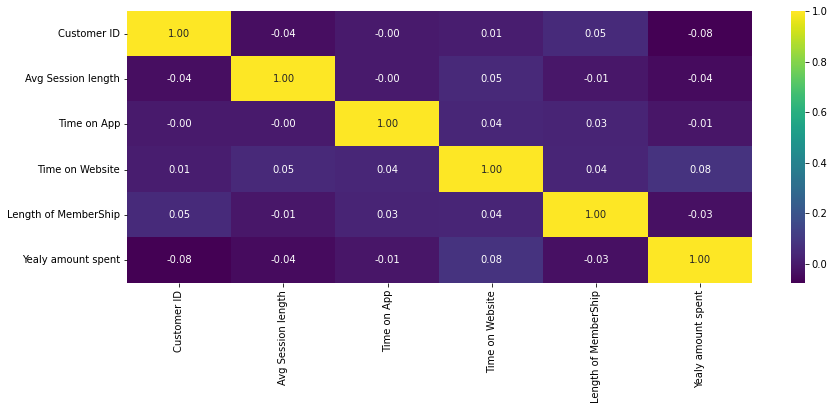

In [12]:
# Finding the ralations between the variables.
plt.figure(figsize=(14,5))
c=df.corr()
sns.heatmap(c,cmap='viridis',annot=True,fmt='.2f')

**Inference from 'r' values and head map**


* NO 2 factors have strong linear relationships
* Avg Session length ,time on app,length of membership are all negatively correlated with yearly amount spent.Have moderate negartive.
* Only Time on website is postively related with all others variables.
* 'Customer ID' is uniformly distributed and there is no correlation with other variable.
   




**Data Preparation**

We will be removing the 'customer ID' as doesn't any sense with the company growth, its just an ID given to customer to locate the company database.'Customer ID" is an irrelvant columns to our dataset.Irrevelant features can decrease the accurancy of the model.


In [13]:
# Dropping irrelvant columns
df=df.drop('Customer ID',axis=1)
df.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641


**Checking Missing ,Duplicated**


In [14]:
# Rows containing duplicated data
duplicated_rows_df=df[df.duplicated()]
print('number of duplicate rows',duplicated_rows_df.shape)

number of duplicate rows (0, 5)


In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
618    False
619    False
620    False
621    False
622    False
Length: 623, dtype: bool

In [16]:
# finding the null values.
print(df.isnull().sum())

Avg Session length      0
Time on App             0
Time on Website         0
Length of MemberShip    0
Yealy amount spent      0
dtype: int64


EDA(Exploratory Data Analysis

Feature Exploration on Distplot and Boxplot

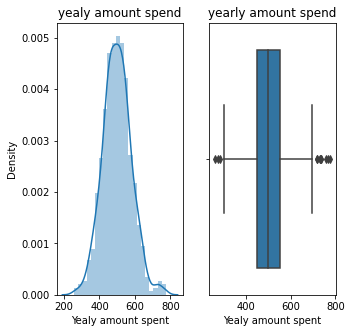

In [17]:
plt.figure(figsize=(5,5))

plt.subplot(1,2,1)
plt.title('yealy amount spend')
sns.distplot(df['Yealy amount spent'])

plt.subplot(1,2,2)
plt.title('yearly amount spend')
sns.boxplot(df['Yealy amount spent'])
plt.show()



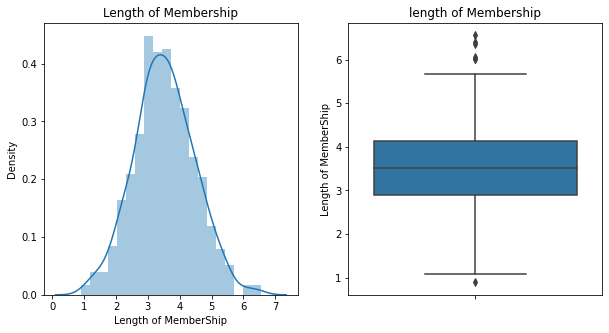

In [18]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Length of Membership')
sns.distplot(df['Length of MemberShip'])

plt.subplot(1,2,2)
plt.title('length of Membership')
sns.boxplot(y=df['Length of MemberShip'])
plt.show()

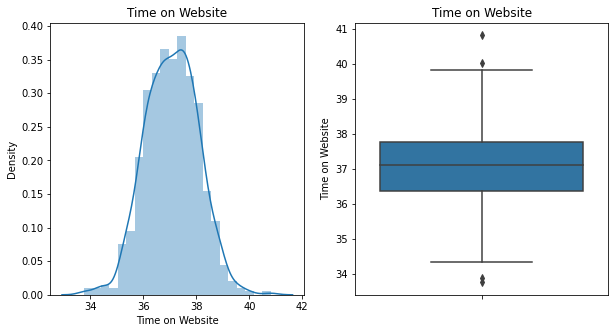

In [19]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Time on Website')
sns.distplot(df['Time on Website'])

plt.subplot(1,2,2)
plt.title('Time on Website')
sns.boxplot(y=df['Time on Website'])

plt.show()

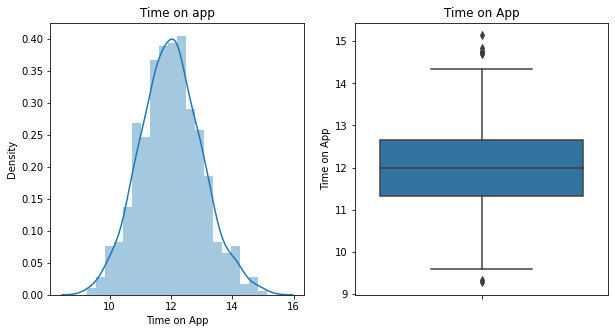

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Time on app')
sns.distplot(df['Time on App'])

plt.subplot(1,2,2)
plt.title('Time on App')
sns.boxplot(y=df['Time on App'])

plt.show()

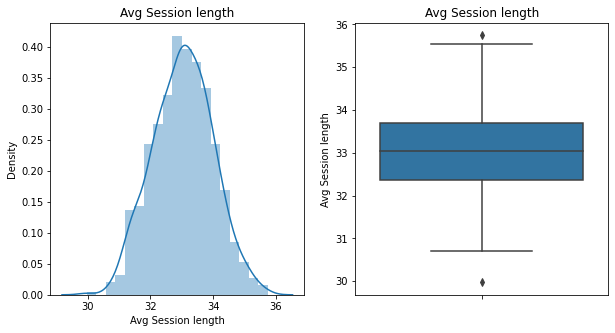

In [21]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Avg Session length')
sns.distplot(df['Avg Session length'])

plt.subplot(1,2,2)
plt.title('Avg Session length')
sns.boxplot(y=df['Avg Session length'])

plt.show()

Inference from above plot

in above Displot and boxplot visualization.
(Left-distplot) all the variable are normally distributed, and there are little skewnwss in the dataset.
for the (Right-Boxplot) wecan see'Yearly amount spent'&'Length of Membership' consists lot of outliers present below the minium and the maximum .These outliers value needs to be treated and there are several ways of treating them:


**Features Exploration on Histplot**

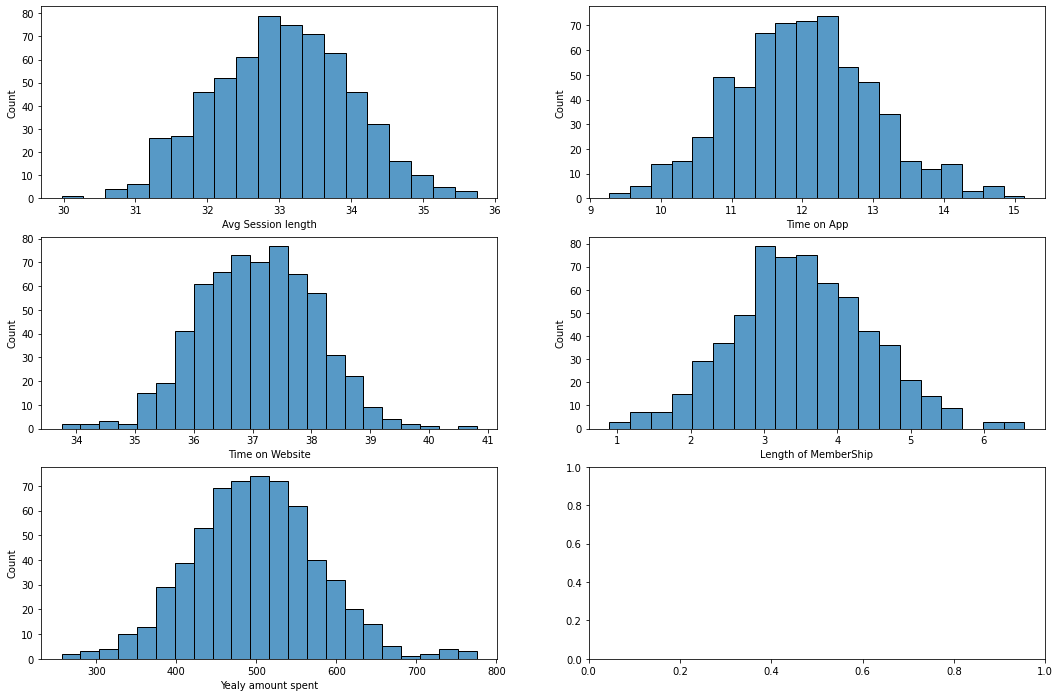

In [22]:
figure, ax=plt.subplots(3, 2,figsize=(18,12))
sns.histplot(x=df['Avg Session length'],data=df,ax=ax[0,0]);
sns.histplot(x=df['Time on App'],data=df,ax=ax[0,1]);
sns.histplot(x=df['Time on Website'],data=df,ax=ax[1,0]);
sns.histplot(x=df['Length of MemberShip'],data=df,ax=ax[1,1]);
sns.histplot(x=df['Yealy amount spent'],data=df,ax=ax[2,0])
plt.show()


**Checking the Objective with the feature**
As Per Our Company Business or BUsiness Objecctive:
THe company is trying to decide whether to focus their efforts on their mobile app experience or thier website.Interpret which variable are contributing towards the more annual income prediction.

So,if we want to derive the company annual income that will depend on how much your customer spent in your company on your product that is how much customer purchases and leads to company income.
So,'Yearly amount spend' by customer will be our Target variable.
We will dicuss more on this below by visualization.





**plot ddiffernt feature against one  another(scatter).agianst frequency(histogram)**



In [23]:
def scatter(x,fig):
  plt.subplot(5,2,fig)
  plt.scatter(df[x],df['Yealy amount spent'])
  plt.title(x+'Vs Yearly amount spent')
  plt.ylabel('Yealy amount spent')
  plt.xlabel(x)

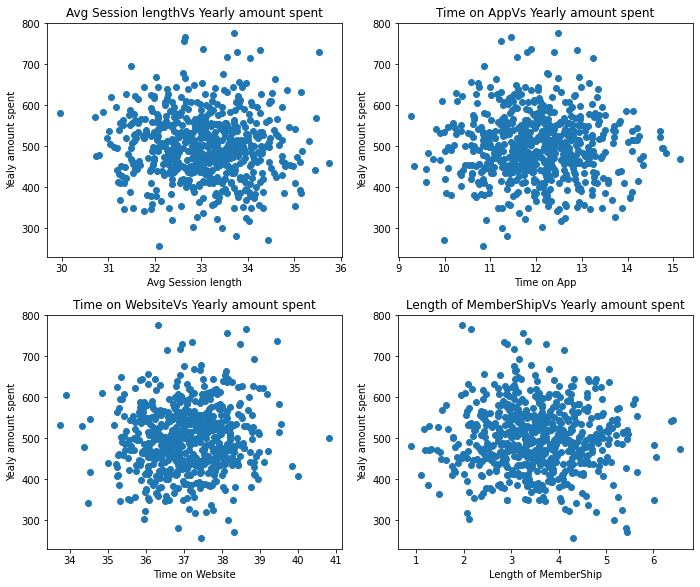

In [24]:
# below is the scatter plot of all the variable with comparsion to our target variable(yearly amount spent)
plt.figure(figsize=(10,20))

scatter('Avg Session length',1)
scatter('Time on App',2)
scatter('Time on Website',3)
scatter('Length of MemberShip',4)

plt.tight_layout()

From Scatter plots, We can see there is no positive nor negative linear relationship between the variable.

Feature Exploration on Pairplot

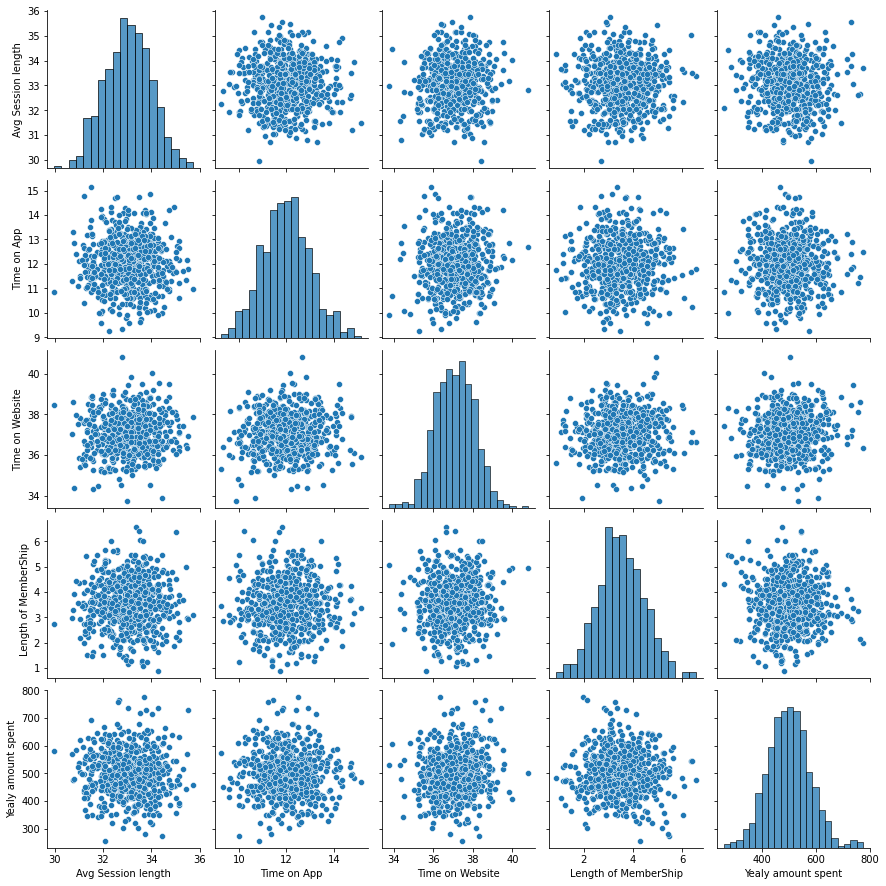

In [25]:
sns.pairplot(df);

**Inference from pairplots**

* From scatter plots,we can see there is no postive nor negative linear relationships between  the variable.
* for distribution all are normally distibuted.

**Feature exploration on Regplot**

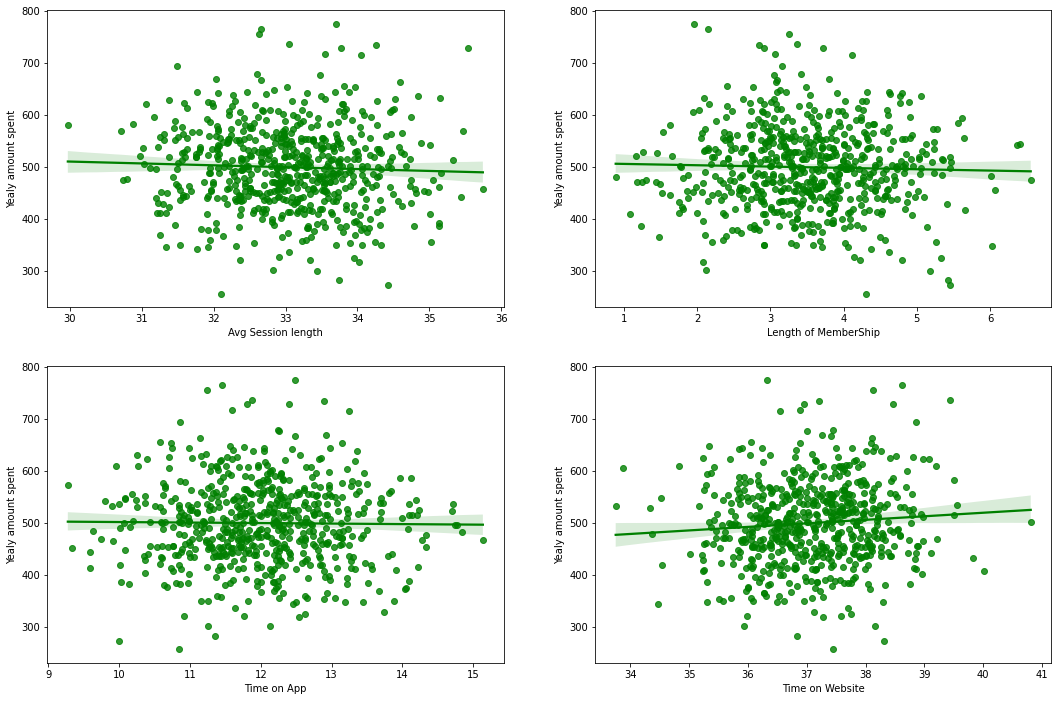

In [26]:
figure,ax=plt.subplots(2,2,figsize=(18,12))
sns.regplot(x=df['Avg Session length'],y=df['Yealy amount spent'],data=df,ax=ax[0,0],color='g')
sns.regplot(x=df['Length of MemberShip'],y=df['Yealy amount spent'],data=df,ax=ax[0,1],color='g')
sns.regplot(x=df['Time on App'],y=df['Yealy amount spent'],data=df,ax=ax[1,0],color='g')
sns.regplot(x=df['Time on Website'],y=df['Yealy amount spent'],data=df,ax=ax[1,1],color='g')


**Inference from Regplot**
From above regplot, we have compare each variables with target variable.Only 'Time on Website' is giving positive response as it increasse.'length of Membership' is uniform to our target variable.rest all the other variables are showing negative relation with target variable.


plot different features against one another barplot using bin

In [27]:
print('number of unique',df['Time on App'].nunique())
print('Max value',df['Time on App'].max())
print('Min value ',df['Time on App'].min())

number of unique 623
Max value 15.13831679
Min value  9.273247557


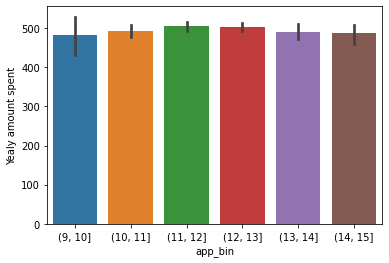

In [28]:
df['app_bin']=pd.cut(df['Time on App'],bins=[9,10,11,12,13,14,15])
sns.barplot(x=df['app_bin'],y=df['Yealy amount spent'])
plt.show()

**Inference from Barplot on Bin Size(Time on App)**

THe barplot above shows that the time on app is increasing the amount spent by customer is decreasing ,as we have above already discuss that if "Mobile app uasage(uasage will rise if time spent on app will rise) is rising in popularity worldwide,which is translating to revenue growth all over the world".So,company needs to find out why revenue on app is decreasing.

In [29]:
print('Number of unique ',df['Time on Website'].nunique())
print('Max value',df['Time on Website'].max())
print('Min Value ',df['Time on Website'].min())

Number of unique  623
Max value 40.80838798
Min Value  33.75107101


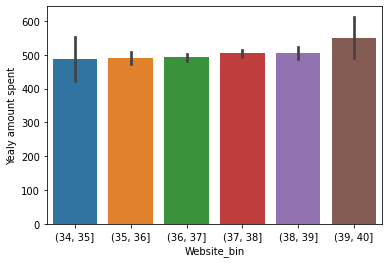

In [30]:
df['Website_bin']=pd.cut(df['Time on Website'],bins=[34,35,36,37,38,39,40])
sns.barplot(x=df['Website_bin'],y=df['Yealy amount spent'])

**Inference from barplot on bin size(time on Website)**

We can clearly see that as the time on website is increasing the customer is also spending more.This shows that company website is generating more revenue than the app.

In [31]:
print('Number of Unique value',df['Avg Session length'].nunique())
print('Max Value',df['Avg Session length'].max())
print('Min value',df['Avg Session length'].min())

Number of Unique value 623
Max Value 35.74441511
Min value 29.97230008


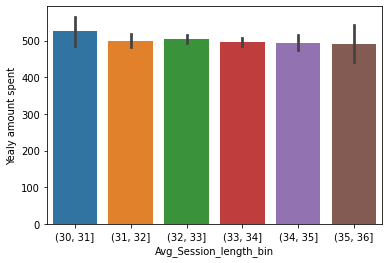

In [32]:
df["Avg_Session_length_bin"]=pd.cut(df['Avg Session length'],bins=[30,31,32,33,34,35,36])
sns.barplot(x=df['Avg_Session_length_bin'],y=df['Yealy amount spent'])

**Inference from barplot on Bin Size(Avg Session length)**

From above plot we can predict that if customer is spending more time at store the revenue generated by its is decreasing, this means that the store facilities is not up to the mark of customer.

Let's see below how it(Avg Session length) affect the order done through app or website.

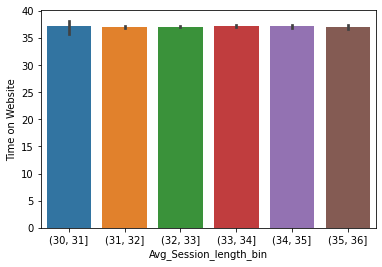

In [33]:
sns.barplot(x=df['Avg_Session_length_bin'],y=df['Time on Website'])

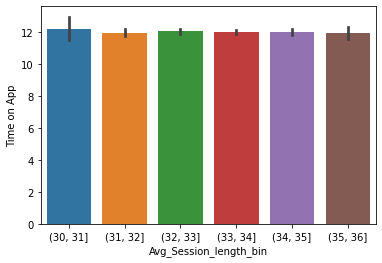

In [34]:
sns.barplot(x=df['Avg_Session_length_bin'],y=df['Time on App'])

Inference from above 2 Barplot

well there is much difference'Avg Session Length' is uniformly distributed among "Time on App" & 'Time on Website'.

In [35]:
print('Number of Unique value',df['Length of MemberShip'].nunique())
print("MAx value",df['Length of MemberShip'].max())
print('min value',df['Length of MemberShip'].min())

Number of Unique value 623
MAx value 6.553916488
min value 0.891398412


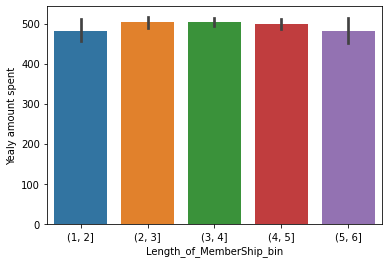

In [36]:
df['Length_of_MemberShip_bin']=pd.cut(df['Length of MemberShip'],bins=[1,2,3,4,5,6])
sns.barplot(x=df['Length_of_MemberShip_bin'],y=df['Yealy amount spent'])

Inference  from barplot on bin size(Length of Membership)

Well 'Length of Membership'and'Yearly amount spend' is showing uniformly.There is no increase in the spending done by customer who are with the company from long time.company has to see into this matter as well,how to increase there spending although they are loyal customer but company has to find a way like giving them extra discount or pre sale entry to increase there spending with the company.

Final Inference from Bin Size

As the time on app is increasing the amount spent by customer is decreasing.Time on Website is increasing the customer is also spending more.This shows that company website is generating more revenue than the appp.

FInal Inference before model building
* Most of the variables are negatively correlated with each other.
* While visualizing barplot we have seen time has been a very important part of company annual income. How variables are distinguish on time basis on differnt platform ,and how they are influencing the company.
* Only Time On Website is postively related with all others variables.
* The dataset is normally distributed.

Essential ways to calculate Feature importance

Feature importance refers to a class of techiques for assigning scores to input feature to a predictive model that indicate the relative importance of each feature when making a prediction.

1. Method 1: Obtain importance from coeffiients.
2. Method 2 : Obtain importance from a tree-based model
3. Method 3: Obtain importance from PCA loading scores

Following are the algorithms i will use to make the model:

1.Model1:Visualizing with the linear model and tree based model techique.
2. Model 2 : visualizing with the linear model and tree based model techique by adjuusting  outliers.
3. MOdel 3: Visualizing with the linear and tree bassed model techique by adjusting outliers and log transformation. 


**DATA SPLITTING**

TRain|Test Split and Scaling
TASK: Separate the features from the labels into 2 objects X,y.

As Our Objective is to find the variables which are contributing towards the more annual income predictions as well as 'Time on App' or 'Time on Website' which is important.Here,we will take:-

X=[Avg Session length,Time on App,Time on Website,Length of Membership]
y=[yealy amount spend]

In [37]:
# Separate out the data into X features and y label.
X=df[df.columns[:4]]
y=df['Yealy amount spent']

In [38]:
def plot_variable_importance(X,y):
  tree=DecisionTreeRegressor(random_state=99)
  tree.fit(X,y)
  plot_model_var_imp(tree,X,y)

In [48]:
def plot_model_var_imp(model,X,y):
  imp=pd.DataFrame(
      model.feature_importances_,
      columns=['Importance'],
      index=X.columns
  )
  imp=imp.sort_values(['Importance'],ascending=True)
  imp[:10].plot(kind= 'barh')
  print(model.score(X,y))

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=101)

Feature importance

selecting the opitional features in the model is important.We will now try to evaluate what the most important variable are for the model to make the prediction.





1.0


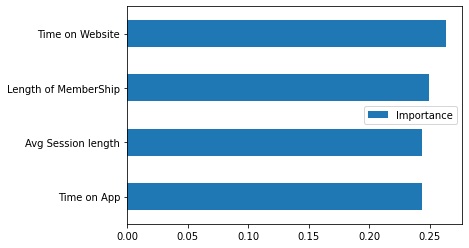

In [50]:
plot_variable_importance(X_train,y_train)

**Modelling**

Model 1: modelling with linear model and tree based model techique with Standard Scaler.

In [53]:
scaler=StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [54]:
scaler.fit(X_train)

StandardScaler()

In [55]:
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

**Fit /TRain the model**



In [61]:
# chossing the best model among the tree based models
MAE_test_scale_1=[]
MAE_train_scale_1=[]
RMSE_test_scale_1=[]
RMSE_train_scale_1=[]

MLA=[LinearRegression(),RANSACRegressor(),Ridge(),Lasso(),ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],tol=0.01),
     SGDRegressor(n_iter_no_change=250,penalty=None,eta0=0.0001,max_iter=100000),
     DecisionTreeRegressor(),RandomForestRegressor(n_estimators=100),SVR(kernel='rbf',C=1000000,epsilon=0.01),
     XGBRegressor(),GradientBoostingRegressor()]

for i in MLA:
     model1=i.fit(X_train_scale,y_train)
     #evaluate the model
     test_pred_scale_1=model1.predict(X_test_scale)
     train_pred_scale_1=model1.predict(X_train_scale)
     # evaluate predictions
     MAE_test_scale_1.append(mean_absolute_error(y_test,test_pred_scale_1))
     MAE_train_scale_1.append(mean_absolute_error(y_train,train_pred_scale_1))
     RMSE_test_scale_1.append(np.sqrt(mean_squared_error(y_test,test_pred_scale_1)))
     RMSE_train_scale_1.append(np.sqrt(mean_squared_error(y_train,train_pred_scale_1))) 

[05:03:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [65]:
result_df_scale_1=pd.DataFrame(MAE_test_scale_1,index=['LinearRegression','RANSACRegressor','Ridge','Lasso','ElasticNetCV',
                                                       'SGDRegressor','DecisionTreeRegressor' ,'RandomForestREgressor',
                                                       'Support Vector Machine','XGBRegressor','GradientBoostingRegressor'],
                              columns=['MAE_test'])
result_df_scale_2=pd.DataFrame(MAE_train_scale_1,index=['LinearRegression','RANSACRegressor','Ridge','Lasso','ElasticNetCV',
                                                        'SGDRegressor','DecisionTreeRegressor','RandomForestRegressor'  
                                                       ,'Support Vector Machine','XGBRegressor','GradientBoostingRegressor'],
                              columns=['MAE_train'])
result_df_scale_3=pd.DataFrame(RMSE_test_scale_1,index=['LinearRegression','RANSACRegressor','Ridge','Lasso','ElasticNetCV',
                                                        'SGDRegressor','DecisionTreeRegressor' ,'RandomForestRegressor' 
                                                       ,'Support Vector Machine','XGBRegressor','GradientBoostingRegressor'],
                              columns=['RMSE_test'])
result_df_scale_4=pd.DataFrame(RMSE_train_scale_1,index=['LinearRegression','RANSACRegressor','Ridge','Lasso','ElasticNetCV',
                                                         'SGDRegressor','DecisionTreeRegressor','RandomForestRegressor'  
                                                       ,'Support Vector Machine','XGBRegressor','GradientBoostingRegressor'],
                              columns=['RMSE_train'])

Evaluation on the test & train set

In [66]:
Model_scale= pd.concat([result_df_scale_1,result_df_scale_2,result_df_scale_3,result_df_scale_4],axis=1)

In [67]:
Model_scale.sort_values(by=['MAE_test'])

,MAE_test,MAE_train,RMSE_test,RMSE_train
ElasticNetCV,59.952889,62.929532,73.391327,80.591725
Lasso,60.056694,62.884589,73.460515,80.592627
SGDRegressor,60.345996,62.888878,73.873524,80.567808
Ridge,60.382623,62.892897,73.847466,80.565753
LinearRegression,60.387280,62.892734,73.852772,80.565750
RandomForestREgressor,63.301422,NaN,NaN,NaN
RANSACRegressor,65.401616,65.366062,78.825157,84.523481
XGBRegressor,66.233551,48.459667,80.599131,62.041255
GradientBoostingRegressor,66.366153,46.881696,81.191594,58.732336
DecisionTreeRegressor,98.645967,0.000000,123.782272,0.000000


Model2: Modelling with the linear model and tree based model techique by adjusting outliers & Standard Scaler.

Modelling by adjusting outliers

In [69]:
df2=dataset.copy()

In [70]:
df2=df2[df2.columns[1:6]]
df2

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641
...,...,...,...,...,...
618,31.941434,11.158640,36.846959,3.219605,559.546775
619,33.446133,12.374820,37.592235,4.917733,515.186966
620,32.967749,11.392061,36.916664,2.955718,601.715746
621,33.469949,11.930872,37.744155,4.577850,477.741395


**DEtecting Outliers**

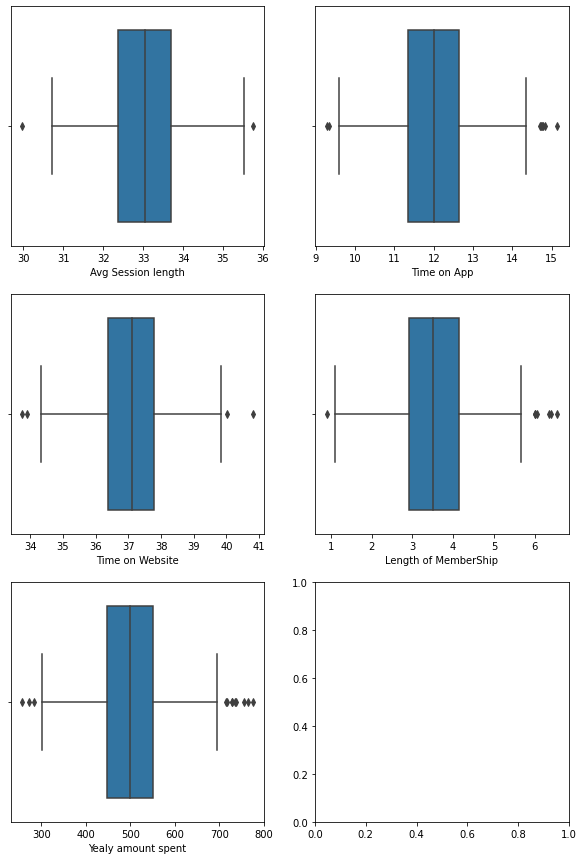

In [71]:
figure,ax=plt.subplots(3,2,figsize=(10,15))
sns.boxplot(x=df2['Avg Session length'],data=df2,ax=ax[0,0]);
sns.boxplot(x=df2['Time on App'],data=df2,ax=ax[0,1]);
sns.boxplot(x=df2['Time on Website'],data=df2,ax=ax[1,0]);
sns.boxplot(x=df2['Length of MemberShip'],data=df2,ax=ax[1,1]);
sns.boxplot(x=df2['Yealy amount spent'],data=df2,ax=ax[2,0]);






In [73]:
Q1=df2['Avg Session length'].quantile(0.25)
Q3=df2['Avg Session length'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)

In [90]:
df_outliers=df2[(df2['Avg Session length'] < lower_limit)| (df2['Avg Session length'] > upper_limit)]
df_outliers.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,37.113631,3.648854,576.098273
1,34.206718,12.226851,37.113631,1.987536,460.784955
2,31.535240,11.814341,37.113631,3.351191,349.739791
3,32.199577,11.295163,37.113631,5.234337,547.709921
4,33.570137,13.500972,37.113631,3.938603,487.055641


In [91]:
median=df2['Avg Session length'].median()
df2['Avg Session length']=np.where((df2['Avg Session length']>=35),median,df2['Avg Session length'])
df2['Avg Session length']=np.where((df2['Avg Session length']<=31.5),median,df2['Avg Session length'])


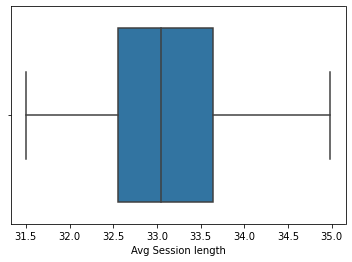

In [92]:
''' visualization'''
import seaborn as sns
sns.boxplot(df2['Avg Session length'])

In [77]:
Q1=df2['Time on App'].quantile(0.25)
Q3=df2['Time on App'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)

In [93]:
df_outliers=df2[(df2['Time on App']< lower_limit)| (df2['Time on App']>upper_limit)]
df_outliers.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,37.113631,3.648854,576.098273
1,34.206718,12.226851,37.113631,1.987536,460.784955
2,31.535240,11.814341,37.113631,3.351191,349.739791
3,32.199577,11.295163,37.113631,5.234337,547.709921
4,33.570137,13.500972,37.113631,3.938603,487.055641


In [79]:
median=df2['Time on App'].median()
df2['Time on App']=np.where((df2['Time on App']>=14.6),median,df2['Time on App'])
df2['Time on App']=np.where((df2['Time on App']<=9.5),median,df2['Time on App'])


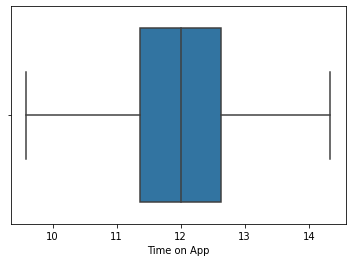

In [80]:
''' visualization'''
import seaborn as sns
sns.boxplot(df2['Time on App'])

In [116]:
Q1=df2['Time on Website'].quantile(0.25)
Q3=df2['Time on Website'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)

In [117]:
df_outliers=df2[(df2['Time on Website'] < lower_limit)| (df2['Time on Website'] > upper_limit)]
df_outliers.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent


In [95]:
median=df2['Time on Website'].median()
df2['Time on Website']=np.where((df2['Time on Website']>=40),median,df2['Time on Website'])
df2['Time on Website']=np.where((df2['Time on Website']<=34),median,df2['Time on Website'])


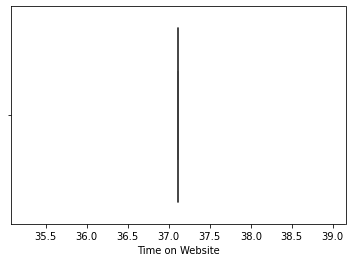

In [101]:
''' visualization'''
import seaborn as sns
sns.boxplot(df2['Time on Website'])

In [106]:
Q1=df2['Length of MemberShip'].quantile(0.25)
Q3=df2['Length of MemberShip'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5* IQR)
upper_limit=Q3+(1.5*IQR)

In [107]:
df_outliers=df2[(df2['Length of MemberShip'] < lower_limit)| (df2['Length of MemberShip'] > upper_limit)]
df_outliers.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
69,32.315148,13.441811,37.113631,6.019829,348.639643
262,33.368670,11.809947,37.113631,6.553916,474.822177
337,33.044399,11.690502,37.113631,6.363211,542.996297
360,34.269842,11.732445,37.113631,0.891398,481.564126
450,33.530223,10.606592,37.113631,6.060564,454.917623


In [114]:
median=df2['Length of MemberShip'].median()
df2['Length of MemberShip']=np.where((df2['Length of MemberShip']  >=6.0),median,df2['Length of MemberShip'])
df2['Length of MemberShip']=np.where((df2['Length of MemberShip'] <=1),median,df2['Length of MemberShip'])


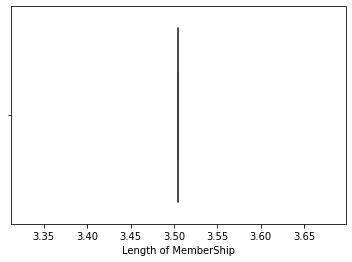

In [115]:
''' visualization'''
import seaborn as sns
sns.boxplot(df2['Length of MemberShip'])

In [119]:
Q1=df2['Yealy amount spent'].quantile(0.25)
Q3=df2['Yealy amount spent'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5* IQR)
upper_limit=Q3+(1.5*IQR)

In [120]:
df_outliers=df2[(df2['Yealy amount spent'] < lower_limit)| (df2['Yealy amount spent'] > upper_limit)]
df_outliers.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
6,34.426982,9.997738,37.113631,3.504771,272.641578
9,33.696003,12.488779,37.113631,3.504771,775.337626
20,32.100980,10.850749,37.113631,3.504771,256.670000
28,34.258991,12.894816,37.113631,3.504771,734.720524
44,32.655103,11.452659,37.113631,3.504771,765.000000


In [124]:
median=df2["Yealy amount spent"].median()
df2['Yealy amount spent']=np.where((df2['Yealy amount spent']>=675),median,df2['Yealy amount spent'])
df2['Yealy amount spent']=np.where((df2['Yealy amount spent']<=320),median,df2['Yealy amount spent'])

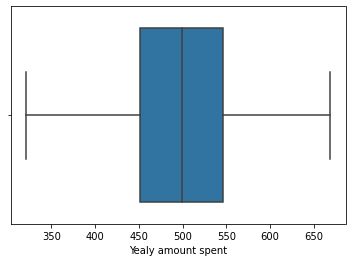

In [125]:
''' visualization'''
import seaborn as sns
sns.boxplot(df2['Yealy amount spent'])

TRain/Test Spilt

In [126]:
# separate out the data into X feature and Y label.
X_out=df2[df2.columns[0:4]]
y_out=df2['Yealy amount spent']

In [128]:
X_train_out,X_test_out,y_train_out,y_test_out=train_test_split(X_out,y_out,test_size=0.15,random_state=101)

Scaling The set

In [129]:
scaler_out=StandardScaler()
scaler_out.fit(X_train_out)


StandardScaler()

In [130]:
X_train_out_scale=scaler.transform(X_train_out)

In [131]:
X_test_out_scale=scaler.transform(X_test_out)

FIT/TRain The model

In [133]:
# chossing the best model among the tree based models
MAE_test_scale_out_1=[]
MAE_train_scale_out_1=[]
RMSE_test_scale_out_1=[]
RMSE_train_scale_out_1=[]

MLA=[LinearRegression(),RANSACRegressor(),Ridge(),Lasso(),ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],tol=0.01),
     SGDRegressor(n_iter_no_change=250,penalty=None,eta0=0.0001,max_iter=100000),
     DecisionTreeRegressor(),RandomForestRegressor(n_estimators=100),SVR(kernel='rbf',C=1000000,epsilon=0.01),
     XGBRegressor(),GradientBoostingRegressor()]

for i in MLA:
     model2=i.fit(X_train_out_scale,y_train_out)
     #evaluate the model
     test_pred_scale_out_1=model2.predict(X_test_out_scale)
     train_pred_scale_out_1=model2.predict(X_train_out_scale)
     # evaluate predictions
     MAE_test_scale_out_1.append(mean_absolute_error(y_test_out,test_pred_scale_out_1))
     MAE_train_scale_out_1.append(mean_absolute_error(y_train_out,train_pred_scale_out_1))
     RMSE_test_scale_out_1.append(np.sqrt(mean_squared_error(y_test_out,test_pred_scale_out_1)))
     RMSE_train_scale_out_1.append(np.sqrt(mean_squared_error(y_train_out,train_pred_scale_out_1))) 

[07:23:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [141]:
result_df_scale_out_1=pd.DataFrame(MAE_test_scale_out_1,index=['LinearRegression','RANSACRegressor','Ridge','Lasso','ElasticNetCV',
                                                       'SGDRegressor','DecisionTreeRegressor' ,'RandomForestRegressor',
                                                       'Support Vector Machine','XGBRegressor','GradientBoostingRegressor'],
                              columns=['MAE_test'])
result_df_scale_out_2=pd.DataFrame(MAE_train_scale_out_1,index=['LinearRegression','RANSACRegressor','Ridge','Lasso','ElasticNetCV',
                                                        'SGDRegressor','DecisionTreeRegressor','RandomForestRegressor'  
                                                       ,'Support Vector Machine','XGBRegressor','GradientBoostingRegressor'],
                              columns=['MAE_train'])
result_df_scale_out_3=pd.DataFrame(RMSE_test_scale_out_1,index=['LinearRegression','RANSACRegressor','Ridge','Lasso','ElasticNetCV',
                                                        'SGDRegressor','DecisionTreeRegressor' ,'RandomForestRegressor' 
                                                       ,'Support Vector Machine','XGBRegressor','GradientBoostingRegressor'],
                              columns=['RMSE_test'])
result_df_scale_Out_4=pd.DataFrame(RMSE_train_scale_out_1,index=['LinearRegression','RANSACRegressor','Ridge','Lasso','ElasticNetCV',
                                                         'SGDRegressor','DecisionTreeRegressor','RandomForestRegressor'  
                                                       ,'Support Vector Machine','XGBRegressor','GradientBoostingRegressor'],
                              columns=['RMSE_train'])

Evaluation on the test & train set

In [142]:
Model_scale_out=pd.concat([result_df_scale_out_1,result_df_scale_out_2,result_df_scale_out_3,result_df_scale_Out_4],axis=1)

In [143]:
Model_scale_out.sort_values(by=['MAE_test'])

,MAE_test,MAE_train,RMSE_test,RMSE_train
XGBRegressor,55.748580,46.427204,69.879265,57.626207
RANSACRegressor,57.207667,57.904628,71.009535,72.795715
Lasso,57.300558,56.263606,70.386766,70.235958
ElasticNetCV,57.381727,56.265281,70.457952,70.224653
SGDRegressor,57.434814,56.292243,70.543843,70.221796
Ridge,57.515006,56.266155,70.596453,70.217431
LinearRegression,57.517097,56.266226,70.598731,70.217429
GradientBoostingRegressor,57.572489,44.161945,71.836434,54.762987
RandomForestRegressor,60.318148,23.377926,76.757105,28.908618
Support Vector Machine,65.221915,50.165989,80.825267,66.688653


Model3: Modelling with the linear model and tree based model techiques by adjusting outliers & Log Transformation

Train|test Split

In [144]:
# Separate out the data into X features and y_label.
X_out=df2[df2.columns[:4]]
y_out=df2['Yealy amount spent']

In [145]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(X_out,y_out,test_size=0.3,random_state=101)

log Transformation

In [147]:
X_train_log=np.log(X_train_log)
X_test_log=np.log(X_test_log)

FIT/train Model

In [148]:
# chossing the best model among the tree based models
MAE_test_log_out_1=[]
MAE_train_log_out_1=[]
RMSE_test_log_out_1=[]
RMSE_train_log_out_1=[]

MLA=[LinearRegression(),RANSACRegressor(),Ridge(),Lasso(),ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],tol=0.01),
     SGDRegressor(n_iter_no_change=250,penalty=None,eta0=0.0001,max_iter=100000),
     DecisionTreeRegressor(),RandomForestRegressor(n_estimators=100),SVR(kernel='rbf',C=1000000,epsilon=0.01),
     XGBRegressor(),GradientBoostingRegressor()]

for i in MLA:
     model3=i.fit(X_train_log,y_train_log)
     #evaluate the model
     test_pred_log_out_1=model3.predict(X_test_log)
     train_pred_log_out_1=model3.predict(X_train_log)
     # evaluate predictions
     MAE_test_log_out_1.append(mean_absolute_error(y_test_log,test_pred_log_out_1))
     MAE_train_log_out_1.append(mean_absolute_error(y_train_log,train_pred_log_out_1))
     RMSE_test_log_out_1.append(np.sqrt(mean_squared_error(y_test_log,test_pred_log_out_1)))
     RMSE_train_log_out_1.append(np.sqrt(mean_squared_error(y_train_log,train_pred_log_out_1))) 

[08:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [149]:
result_df_log_out_1=pd.DataFrame(MAE_test_log_out_1,index=['LinearRegression','RANSACRegressor','Ridge','Lasso','ElasticNetCV',
                                                       'SGDRegressor','DecisionTreeRegressor' ,'RandomForestRegressor',
                                                       'Support Vector Machine','XGBRegressor','GradientBoostingRegressor'],
                              columns=['MAE_test'])
result_df_log_out_2=pd.DataFrame(MAE_train_log_out_1,index=['LinearRegression','RANSACRegressor','Ridge','Lasso','ElasticNetCV',
                                                        'SGDRegressor','DecisionTreeRegressor','RandomForestRegressor'  
                                                       ,'Support Vector Machine','XGBRegressor','GradientBoostingRegressor'],
                              columns=['MAE_train'])
result_df_log_out_3=pd.DataFrame(RMSE_test_log_out_1,index=['LinearRegression','RANSACRegressor','Ridge','Lasso','ElasticNetCV',
                                                        'SGDRegressor','DecisionTreeRegressor' ,'RandomForestRegressor' 
                                                       ,'Support Vector Machine','XGBRegressor','GradientBoostingRegressor'],
                              columns=['RMSE_test'])
result_df_log_Out_4=pd.DataFrame(RMSE_train_log_out_1,index=['LinearRegression','RANSACRegressor','Ridge','Lasso','ElasticNetCV',
                                                         'SGDRegressor','DecisionTreeRegressor','RandomForestRegressor'  
                                                       ,'Support Vector Machine','XGBRegressor','GradientBoostingRegressor'],
                              columns=['RMSE_train'])

In [151]:
Model_log_out=pd.concat([result_df_log_out_1,result_df_log_out_2,result_df_log_out_3,result_df_log_Out_4],axis=1)

In [154]:
Model_log_out.sort_values(by=['MAE_test'])

,MAE_test,MAE_train,RMSE_test,RMSE_train
Support Vector Machine,55.240156,56.374904,69.168302,70.603169
Lasso,55.640528,56.819235,69.395817,70.810114
ElasticNetCV,55.643067,56.817953,69.417681,70.713599
Ridge,55.654894,56.816415,69.424706,70.692192
LinearRegression,55.714073,56.768388,69.470833,70.609709
SGDRegressor,55.728539,56.906271,69.450019,70.985807
RANSACRegressor,56.471976,57.511131,70.224254,72.138918
XGBRegressor,57.301049,44.198960,71.028952,55.819442
GradientBoostingRegressor,57.778736,42.498644,71.914426,53.653768
RandomForestRegressor,60.635029,23.350579,75.699011,29.102252


Finalizing Model choice

In [155]:
LA=Lasso().fit(X_train_log,y_train_log)
  

In [178]:
# Getting the coef for relevant features
coef=list(LA.coef_[:4]) + list(LA.coef_[-3:])
#getting the names of relevant features
feature_name=list(X.columns[:4]) + list(X.columns[-3:])

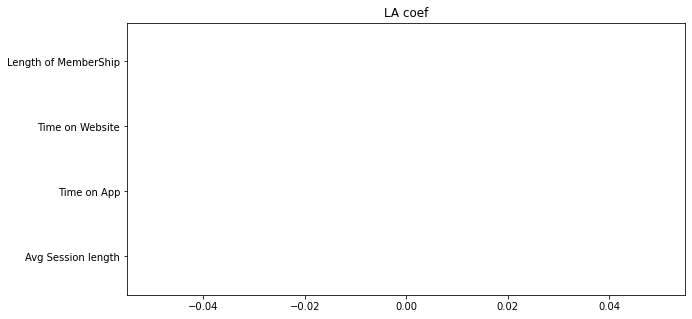

In [180]:
#plotting the coef and feature importance 
fig,ax=plt.subplots(figsize=(10,5))
ax.barh(feature_name,coef)
ax.set_title('LA coef')
plt.show()

from all the three model metrics, we came up that lasso is giving us the least MAE error althought we cannot use lasso as coefficient for features are not available are not avaiable.but we can Ridge as we can get all the coefficients for all the variable.

In [166]:
final_model=Ridge()

In [168]:
final_model.fit(X_train_log,y_train_log)

Ridge()

Final hold Out test performance for reporting

In [169]:
test_pred=final_model.predict(X_test_log)
train_pred=final_model.predict(X_train_log)

In [170]:
MAE_tst=mean_absolute_error(y_test_log,test_pred)
MSE_tst=mean_squared_error(y_test_log,test_pred)
RMSE_tst=np.sqrt(MSE_tst)

In [171]:
MAE_tr=mean_absolute_error(y_train_log,train_pred)
MSE_tr=mean_squared_error(y_train_log,train_pred)
RMSE_tr=np.sqrt(MSE_tr)

In [172]:
print('test MAE:',MAE_tst)
print('Test RMSE:',RMSE_tst)
print('TRain MAE:',MAE_tr)
print('TRain RMSE:',RMSE_tr)

test MAE: 55.65489437560035
Test RMSE: 69.42470594630913
TRain MAE: 56.81641473291631
TRain RMSE: 70.69219214755286


In [173]:
# getting the coef for relevant features
coef=list(final_model.coef_[:4])+ list(final_model.coef_[-3:])
#getting the names of relevant features
feature_name=list(X.columns[:4])+list(X.columns[-3:])

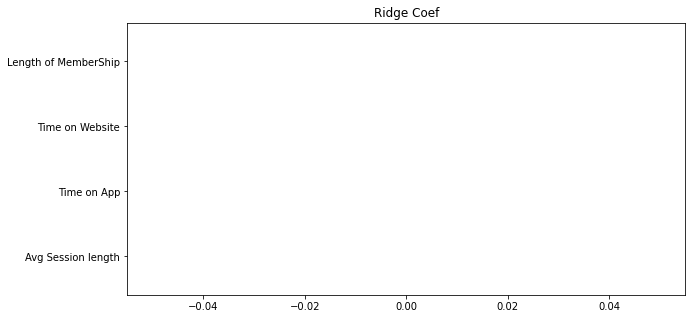

In [181]:
#plotting the coef and feature importance 
fig,ax=plt.subplots(figsize=(10,5))
ax.barh(feature_name,coef)
ax.set_title('Ridge Coef')
plt.show()

In [182]:
final_mod=Ridge()


In [183]:
final_mod.fit(X,y)

Ridge()

DEployment

saving model (and anything else as pickle file

In [184]:
from joblib import dump,load
import joblib

In [185]:
joblib.dump(final_mod,'Ecommerce.pkl')

['Ecommerce.pkl']

In [186]:
X.columns

Index(['Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip'],
      dtype='object')

In [188]:
list(X.columns)

['Avg Session length',
 'Time on App',
 'Time on Website',
 'Length of MemberShip']

In [189]:
joblib.dump(list(X.columns),'column_names.pkl')

['column_names.pkl']

Loading Model (model persistence)

In [190]:
col_names=joblib.load('column_names.pkl')

In [191]:
col_names

['Avg Session length',
 'Time on App',
 'Time on Website',
 'Length of MemberShip']

In [192]:
loaded_model=joblib.load('Ecommerce.pkl')

In [194]:
loaded_model.predict([[32.2134387,12.16218202,36.76804478,4.020016783]])

array([499.06061948])

# **Conclusion & recommendation**

* Both models and our data analysis shows that 'Website' generates more than 'Mobile App'.So company should focus there budget on website to make it more suitable for the customer.
* But as we Know the exploding popularity of smartphones and tablets has made mobile application development an increaasingly popular trend among business owners all over the world.And as above we have also discussed how discussed how benefit a mobile app  is we should enhance our user exp.on the Mobile App as well 
* To increase the company sale from mobile app company should try to make discount chart ,if customer order more product from company app than more discount be allowed.
* And just a website maintance will be benefical for regular smooth working of the company.
* While doing EDA we have seen length of Membership and Yearly amount spent is showing uniformality .there is no increase in the spending done by customer who are with the company from long time. Company has to see into this matter as well ,how to increase there spending although they are loyal customer but company has to find a way like giving them extra discount or pre sale entry to increase there spending with the company.
* Lastly,So as time on Website is a much more significant factor than time on APP,the company has a choice : they could either focus all the attention into website as that  is what  is bringing the most money in ,or they could focus on the app as it is performing so poorly! I would recommend company to spend more on website and make it more smooth but also increase the user exp.on mobile app as well
